In [1]:
# Mahipalsing Assignments

In [1]:
# Imoprt Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
# Load data sets
company_data = pd.read_csv("F:\Data Science\Assignment\Decision Trees\Data\Company_Data.csv")
company_data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [3]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company_data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


C:\Users\SRJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


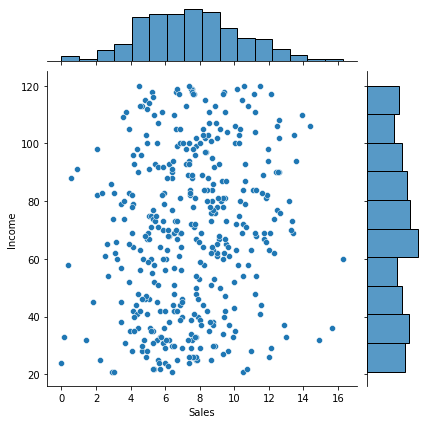

In [5]:
sns.jointplot(company_data['Sales'],company_data['Income'])

In [22]:
company_data.loc[company_data["Sales"] <= 10.00,"Sales1"]="Not High"
company_data.loc[company_data["Sales"] >= 10.01,"Sales1"]="High"

In [23]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,Not High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Not High
4,4.15,141,64,3,340,128,0,38,13,1,0,Not High
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Not High
397,7.41,162,26,12,368,159,2,40,18,1,1,Not High
398,5.94,100,79,7,284,95,0,50,12,1,1,Not High


# Label Encoding

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [28]:
company_data["ShelveLoc"] = label_encoder.fit_transform(company_data["ShelveLoc"])
company_data["Urban"] = label_encoder.fit_transform(company_data["Urban"])
company_data["US"] = label_encoder.fit_transform(company_data["US"])
company_data["Sales1"] = label_encoder.fit_transform(company_data["Sales1"])

In [29]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [39]:
# Define x & y
x = company_data.iloc[:,1:11]
y = company_data['Sales1']

In [40]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=50)

# Building Decision Tree Classifier using Entropy Criteria

In [54]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [55]:
model.get_n_leaves()

8

In [56]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    70
0    10
dtype: int64

In [57]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [58]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales1,,
0,7,11
1,3,59


In [59]:
# Accuracy 
np.mean(preds==y_test)

0.825

In [60]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.39      0.70      0.50        10
           1       0.95      0.84      0.89        70

    accuracy                           0.82        80
   macro avg       0.67      0.77      0.70        80
weighted avg       0.88      0.82      0.84        80



# Building Decision Tree Classifier (CART) using Gini Criteria

In [61]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [69]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [70]:
model_gini.get_n_leaves()

8

In [71]:
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    68
0    12
dtype: int64

In [72]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [82]:
# Accuracy 
np.mean(preds==y_test)

0.8

In [83]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

         0.0       0.39      0.58      0.47        12
         1.0       0.92      0.84      0.88        68

    accuracy                           0.80        80
   macro avg       0.65      0.71      0.67        80
weighted avg       0.84      0.80      0.82        80



# Building Decision Tree Regression 

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
model_R = DecisionTreeRegressor()
model_R.fit(x_train, y_train)

DecisionTreeRegressor()

In [86]:
preds = model_R.predict(x_test) 

In [87]:
np.mean(preds==y_test)

0.8125

# Plot Tree Diagram

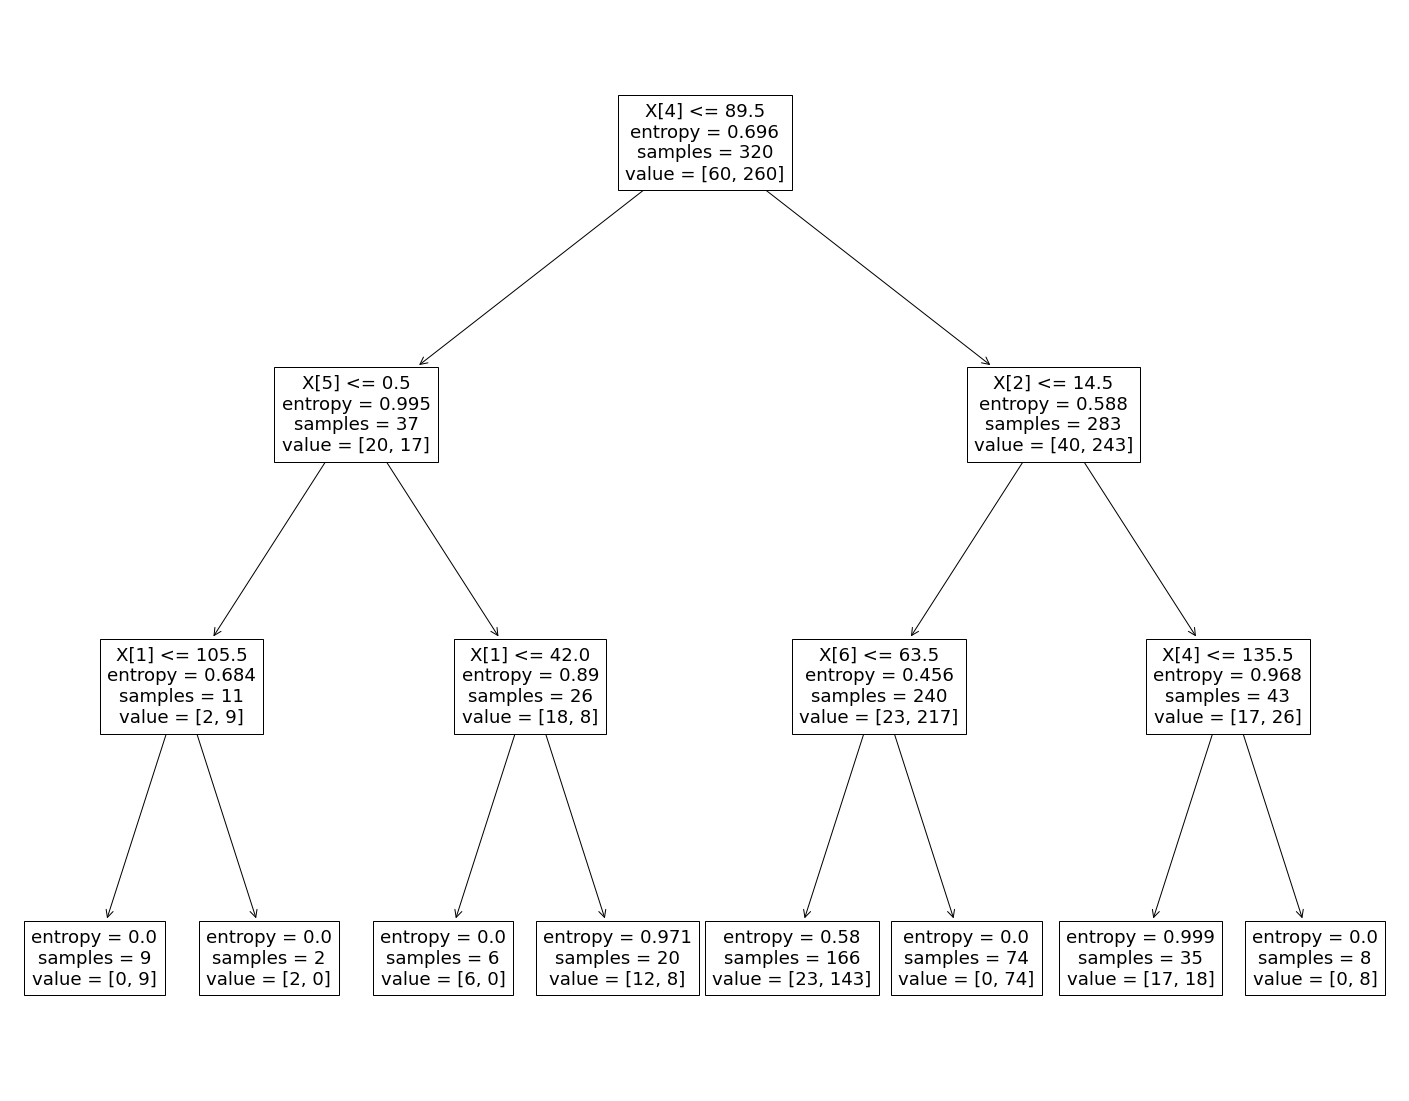

In [88]:
# Decision Tree Classifier using Entropy Criteria
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model)

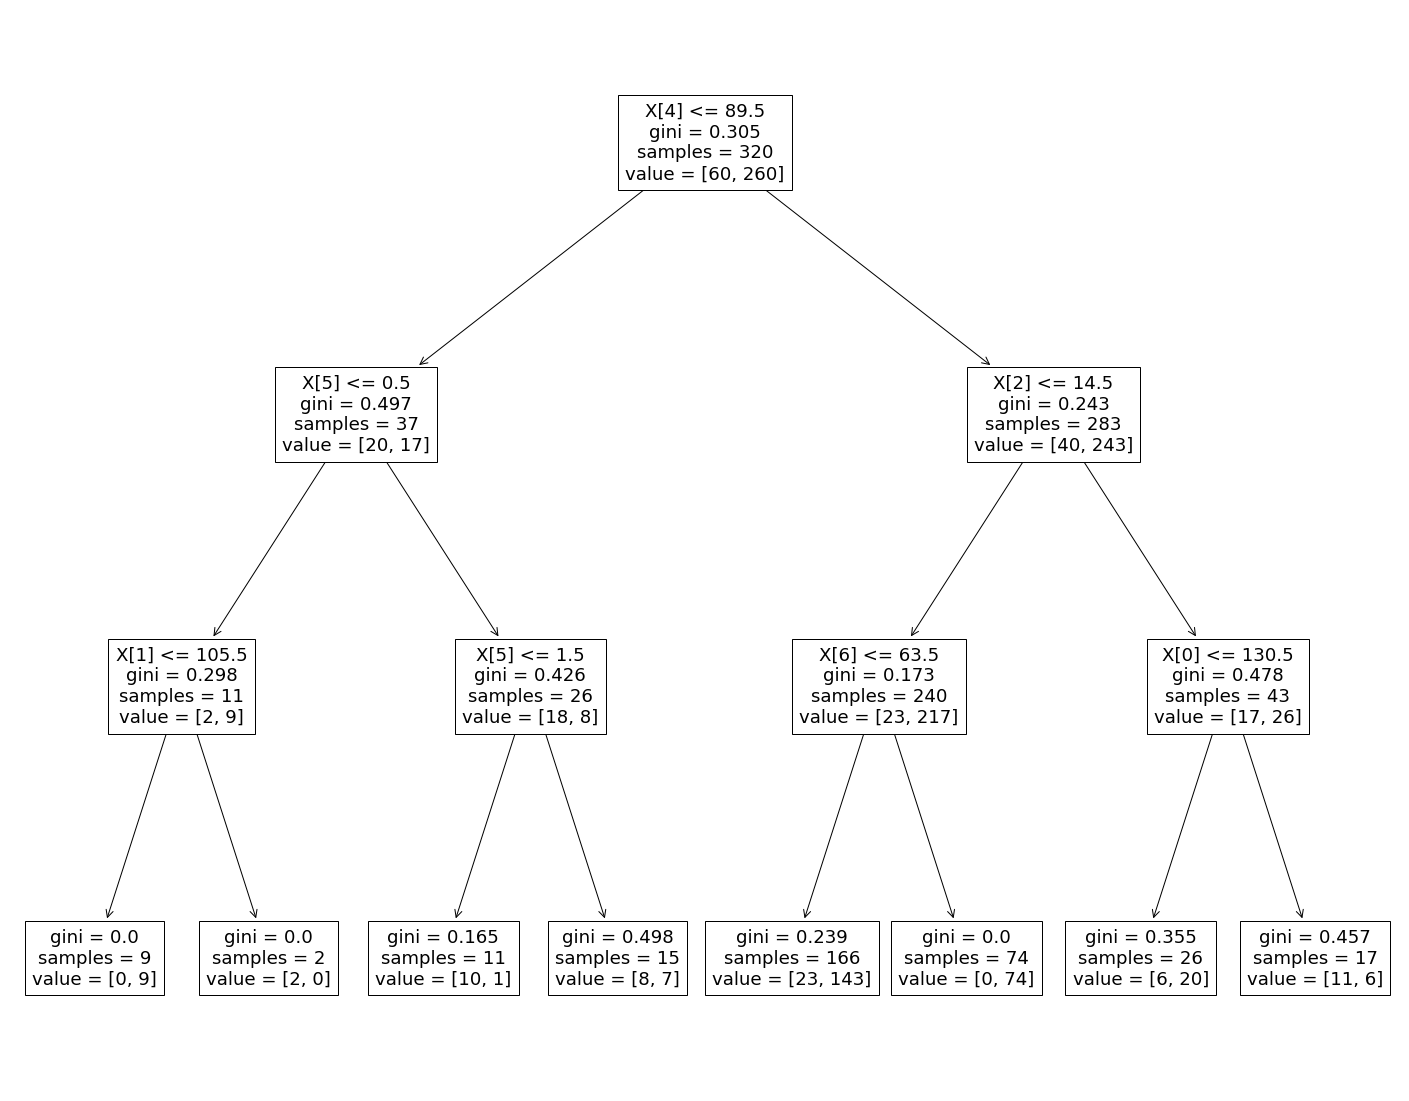

In [89]:
# Decision Tree Classifier (CART) using Gini Criteria
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini)

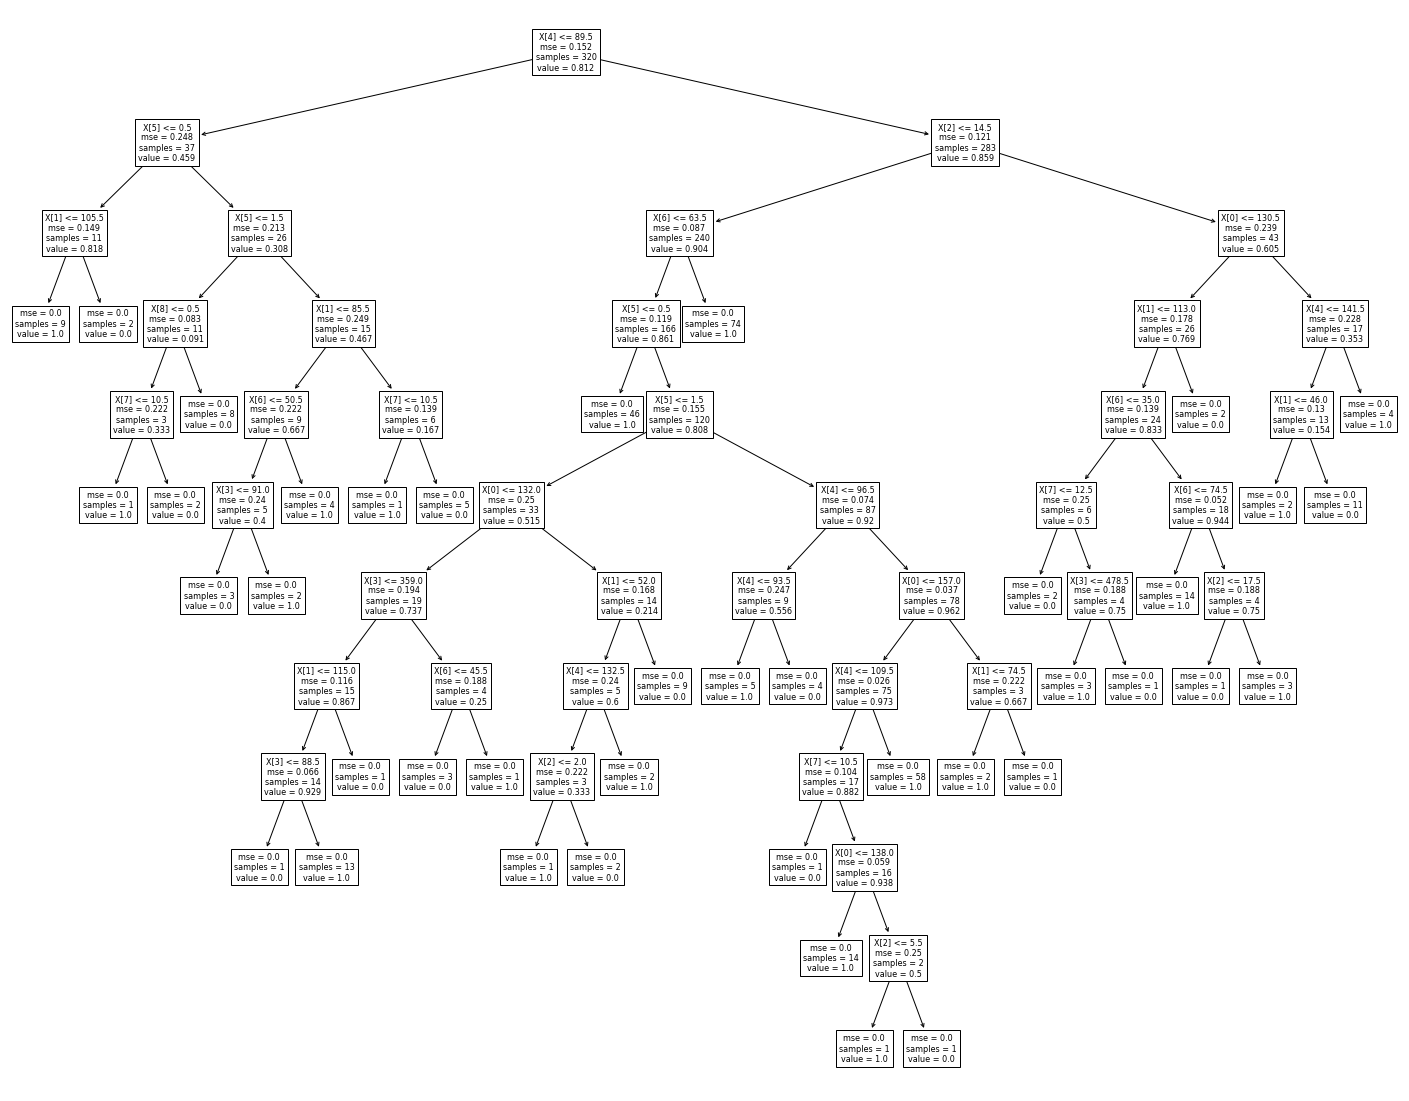

In [81]:
# Decision Tree Regression
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_R)